# Joel Ong Machine Final Year Project 
# Student Number: 210485914
#### Amercian Sign Language Recognition using Machine Learning Techniques

Link to Dataset: https://www.kaggle.com/datasets/datamunge/sign-language-mnist?resource=download

In [1]:
# importing tensorflow, matplotlib and libraries for my coursework #
import pandas as pd
import tensorflow as tf
import matplotlib as plt 
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
import cv2 

In [2]:
# print version number of TensorFlow library and Keras module #
print(tf.__version__, ' ', tf.keras.__version__)

2.10.0   2.10.0


In [3]:
# where my numpy library is located #
np

<module 'numpy' from 'D:\\SIM-UOL Softwares\\Anaconda\\lib\\site-packages\\numpy\\__init__.py'>

### 1) Defining the problem and assembling a dataset

In [4]:
# importing the ASL mnist dataset from the downloaded csv files #
testSet = pd.read_csv('sign_mnist_test.csv')
trainSet = pd.read_csv('sign_mnist_train.csv')

#### Exploring the dataset

In [5]:
# length of the testset and trainset in the data set # 
print(f"length of training set: {len(testSet)}")
print(f"length of training set: {len(trainSet)}")
trainSet[0:5]

length of training set: 7172
length of training set: 27455


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


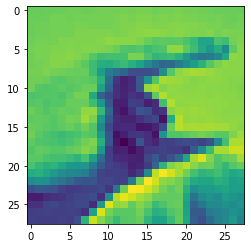

In [39]:
# example of 1 image in the testset #
plt.imshow(testSet[0])

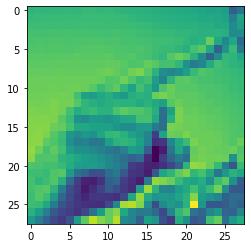

In [40]:
# example of 1 image in the trainset #
plt.imshow(trainSet[1])

In [6]:
# info of testset #
testSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7172 entries, 0 to 7171
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 43.0 MB


In [7]:
# info of train set #
trainSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 164.4 MB


In [8]:
# data inside testset, the colour of each pixel in the picture #
testSet

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7167,1,135,119,108,102,105,99,61,103,121,...,108,112,116,114,118,180,184,176,167,163
7168,12,157,159,161,164,166,166,171,174,175,...,213,213,213,214,213,211,210,210,209,208
7169,2,190,191,190,191,190,190,192,192,191,...,216,215,213,214,214,213,210,211,209,208
7170,4,201,205,208,209,214,216,218,223,226,...,112,169,255,255,237,113,91,67,70,63


In [9]:
# data inside trainset, the colour of each pixel in the picture #
trainSet

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27450,13,189,189,190,190,192,193,193,193,193,...,132,165,99,77,52,200,234,200,222,225
27451,23,151,154,157,158,160,161,163,164,166,...,198,198,198,198,198,196,195,195,195,194
27452,18,174,174,174,174,174,175,175,174,173,...,121,196,209,208,206,204,203,202,200,200
27453,17,177,181,184,185,187,189,190,191,191,...,119,56,27,58,102,79,47,64,87,93


The ASL MNIST dataset that I am working on has 7172 x 785 of data for the test set, and 27455 x 785 for the train set. In the dataset, the first column is the label of the dataset while the rest of the 784 columns are the pixels which make it into a picture 28 x 28 pixels of the hand sign. 

As mentioned, there are a total of 24 letters which means there are 24 different classes. Which makes it a multiclass classification problem.



### 2) Choosing a measure of success


My personal goal for this final year project is to get the accuracy as high as possible and if possible, more than 95%.

### 3) Deciding on an evaluation protocol

For my final year project coursework, I will be using the hold-out validation evaluation protocol as the dataset is large and has been already split to test and training set in CSV files. Hold-old validation evaluation protocol is most suited for this dataset.



### 4) Preparing your data

In the preparation  of my data, I have to check if the dataset I am using has any missing or null values.

In [10]:
# Checking for missing or null values in testset #
testSet.isnull().sum()

label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64

In [11]:
# Checking for missing or null values in trainset #
trainSet.isnull().sum()

label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64

Next, I am going to remove the 1st column (label) from the dataset so it will be easier later on, to train it and test it. 

In [12]:
testSetLabels = testSet['label']
testSetLabels = tf.keras.utils.to_categorical(testSetLabels)

In [13]:
trainSetLabels = trainSet['label']
trainSetLabels = tf.keras.utils.to_categorical(trainSetLabels)

In [14]:
testSet.drop('label', inplace = True, axis = 1)
testSet = testSet.values.reshape(-1, 28, 28, 1)

trainSet.drop('label', inplace = True, axis = 1)
trainSet = trainSet.values.reshape(-1, 28, 28, 1)

In [15]:
# checking the rows & columns is what I wanted #
print(f"Test data: {testSet.shape}")
print(f"Training data: {trainSet.shape}")

Test data: (7172, 28, 28, 1)
Training data: (27455, 28, 28, 1)


In [16]:
# printing test & train dataset and showing the first 3 elemnts of the trainset #
print(f"length of training set: {len(testSet)}")
print(f"length of training set: {len(trainSet)}")
trainSet[0:3]

length of training set: 7172
length of training set: 27455


array([[[[107],
         [118],
         [127],
         ...,
         [170],
         [170],
         [169]],

        [[111],
         [121],
         [129],
         ...,
         [171],
         [171],
         [170]],

        [[113],
         [123],
         [131],
         ...,
         [171],
         [171],
         [171]],

        ...,

        [[142],
         [150],
         [159],
         ...,
         [202],
         [201],
         [200]],

        [[142],
         [151],
         [160],
         ...,
         [204],
         [203],
         [202]],

        [[142],
         [151],
         [160],
         ...,
         [204],
         [203],
         [202]]],


       [[[155],
         [157],
         [156],
         ...,
         [138],
         [ 92],
         [108]],

        [[158],
         [159],
         [159],
         ...,
         [142],
         [116],
         [143]],

        [[161],
         [161],
         [161],
         ...,
         [147],
         [

#### Next, I will convert the data into tensors 

In [17]:
testSetTensor = tf.convert_to_tensor(testSet)
print(testSetTensor)

tf.Tensor(
[[[[149]
   [149]
   [150]
   ...
   [150]
   [150]
   [149]]

  [[150]
   [150]
   [150]
   ...
   [151]
   [150]
   [151]]

  [[150]
   [151]
   [151]
   ...
   [151]
   [151]
   [152]]

  ...

  [[ 69]
   [ 69]
   [ 77]
   ...
   [116]
   [113]
   [118]]

  [[ 74]
   [ 75]
   [ 76]
   ...
   [110]
   [116]
   [113]]

  [[ 75]
   [ 74]
   [ 74]
   ...
   [112]
   [120]
   [107]]]


 [[[126]
   [128]
   [131]
   ...
   [133]
   [134]
   [132]]

  [[129]
   [132]
   [134]
   ...
   [136]
   [136]
   [134]]

  [[133]
   [135]
   [138]
   ...
   [140]
   [139]
   [138]]

  ...

  [[173]
   [174]
   [177]
   ...
   [184]
   [182]
   [181]]

  [[172]
   [174]
   [177]
   ...
   [184]
   [182]
   [181]]

  [[172]
   [174]
   [177]
   ...
   [184]
   [182]
   [180]]]


 [[[ 85]
   [ 88]
   [ 92]
   ...
   [182]
   [181]
   [178]]

  [[ 86]
   [ 88]
   [ 93]
   ...
   [183]
   [181]
   [179]]

  [[ 86]
   [ 89]
   [ 93]
   ...
   [185]
   [183]
   [181]]

  ...

  [[ 91]
   [ 94]
 

In [18]:
trainSetTensor=tf.convert_to_tensor(trainSet)
print(trainSetTensor)

tf.Tensor(
[[[[107]
   [118]
   [127]
   ...
   [170]
   [170]
   [169]]

  [[111]
   [121]
   [129]
   ...
   [171]
   [171]
   [170]]

  [[113]
   [123]
   [131]
   ...
   [171]
   [171]
   [171]]

  ...

  [[142]
   [150]
   [159]
   ...
   [202]
   [201]
   [200]]

  [[142]
   [151]
   [160]
   ...
   [204]
   [203]
   [202]]

  [[142]
   [151]
   [160]
   ...
   [204]
   [203]
   [202]]]


 [[[155]
   [157]
   [156]
   ...
   [138]
   [ 92]
   [108]]

  [[158]
   [159]
   [159]
   ...
   [142]
   [116]
   [143]]

  [[161]
   [161]
   [161]
   ...
   [147]
   [125]
   [140]]

  ...

  [[162]
   [159]
   [145]
   ...
   [ 91]
   [101]
   [ 94]]

  [[153]
   [139]
   [115]
   ...
   [ 97]
   [ 95]
   [120]]

  [[135]
   [116]
   [ 95]
   ...
   [103]
   [135]
   [149]]]


 [[[187]
   [188]
   [188]
   ...
   [ 66]
   [ 77]
   [ 83]]

  [[188]
   [189]
   [189]
   ...
   [ 73]
   [ 73]
   [ 71]]

  [[190]
   [190]
   [190]
   ...
   [ 74]
   [ 68]
   [ 61]]

  ...

  [[212]
   [198]
 

### Next, I will need to convert the tensors into normalised form of range 0 - 1

"Standardising the features around the center and 0 with a standard deviation of 1 is important when we compare measurements that have different units. Variables that are measured at different scales do not contribute equally to the analysis and might end up creating a bais" [1].

I have to ensure the values in the test and train tensor has either data type of float or double.

In [19]:
# converting data to tensorflow float32 #
testSetTensor = tf.cast(testSetTensor, dtype = tf.float32)
trainSetTensor = tf.cast(trainSetTensor, dtype = tf.float32)

In [20]:
# normalising testset #
testSetTensor = testSetTensor / 255.0
print(testSetTensor)

tf.Tensor(
[[[[0.58431375]
   [0.58431375]
   [0.5882353 ]
   ...
   [0.5882353 ]
   [0.5882353 ]
   [0.58431375]]

  [[0.5882353 ]
   [0.5882353 ]
   [0.5882353 ]
   ...
   [0.5921569 ]
   [0.5882353 ]
   [0.5921569 ]]

  [[0.5882353 ]
   [0.5921569 ]
   [0.5921569 ]
   ...
   [0.5921569 ]
   [0.5921569 ]
   [0.59607846]]

  ...

  [[0.27058825]
   [0.27058825]
   [0.3019608 ]
   ...
   [0.45490196]
   [0.44313726]
   [0.4627451 ]]

  [[0.2901961 ]
   [0.29411766]
   [0.29803923]
   ...
   [0.43137255]
   [0.45490196]
   [0.44313726]]

  [[0.29411766]
   [0.2901961 ]
   [0.2901961 ]
   ...
   [0.4392157 ]
   [0.47058824]
   [0.41960785]]]


 [[[0.49411765]
   [0.5019608 ]
   [0.5137255 ]
   ...
   [0.52156866]
   [0.5254902 ]
   [0.5176471 ]]

  [[0.5058824 ]
   [0.5176471 ]
   [0.5254902 ]
   ...
   [0.53333336]
   [0.53333336]
   [0.5254902 ]]

  [[0.52156866]
   [0.5294118 ]
   [0.5411765 ]
   ...
   [0.54901963]
   [0.54509807]
   [0.5411765 ]]

  ...

  [[0.6784314 ]
   [0.682352

In [21]:
# normalising trainset #
trainSetTensor = trainSetTensor / 255.0
print(trainSetTensor)

tf.Tensor(
[[[[0.41960785]
   [0.4627451 ]
   [0.49803922]
   ...
   [0.6666667 ]
   [0.6666667 ]
   [0.6627451 ]]

  [[0.43529412]
   [0.4745098 ]
   [0.5058824 ]
   ...
   [0.67058825]
   [0.67058825]
   [0.6666667 ]]

  [[0.44313726]
   [0.48235294]
   [0.5137255 ]
   ...
   [0.67058825]
   [0.67058825]
   [0.67058825]]

  ...

  [[0.5568628 ]
   [0.5882353 ]
   [0.62352943]
   ...
   [0.7921569 ]
   [0.7882353 ]
   [0.78431374]]

  [[0.5568628 ]
   [0.5921569 ]
   [0.627451  ]
   ...
   [0.8       ]
   [0.79607844]
   [0.7921569 ]]

  [[0.5568628 ]
   [0.5921569 ]
   [0.627451  ]
   ...
   [0.8       ]
   [0.79607844]
   [0.7921569 ]]]


 [[[0.60784316]
   [0.6156863 ]
   [0.6117647 ]
   ...
   [0.5411765 ]
   [0.36078432]
   [0.42352942]]

  [[0.61960787]
   [0.62352943]
   [0.62352943]
   ...
   [0.5568628 ]
   [0.45490196]
   [0.56078434]]

  [[0.6313726 ]
   [0.6313726 ]
   [0.6313726 ]
   ...
   [0.5764706 ]
   [0.49019608]
   [0.54901963]]

  ...

  [[0.63529414]
   [0.623529

### 5) Developing a model that does better than a baseline

In [22]:
# 1st model #
# keras neural network model #
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(25, activation = 'softmax')
])

In [23]:
# using RMSprop optimizer, categorical cross-entropy loss function, tracking accuracy as a metric #
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

I will be running the model for 10 epoch for indication if there is enough statistical power (where accuracy > 0.5)



In [24]:
# training the 1st network with 10 epochs #
network = model.fit(trainSetTensor, trainSetLabels, epochs = 10, validation_data = (testSetTensor, testSetLabels))

Epoch 1/10
858/858 [==============================] - 2s 1ms/step - loss: 2.2230 - accuracy: 0.3782 - val_loss: 1.8638 - val_accuracy: 0.4688
Epoch 2/10
858/858 [==============================] - 1s 1ms/step - loss: 1.4685 - accuracy: 0.6004 - val_loss: 1.5244 - val_accuracy: 0.5672
Epoch 3/10
858/858 [==============================] - 1s 1ms/step - loss: 1.1811 - accuracy: 0.6830 - val_loss: 1.3424 - val_accuracy: 0.5937
Epoch 4/10
858/858 [==============================] - 1s 1ms/step - loss: 1.0097 - accuracy: 0.7334 - val_loss: 1.2553 - val_accuracy: 0.6325
Epoch 5/10
858/858 [==============================] - 1s 1ms/step - loss: 0.8889 - accuracy: 0.7674 - val_loss: 1.2055 - val_accuracy: 0.6527
Epoch 6/10
858/858 [==============================] - 1s 1ms/step - loss: 0.7959 - accuracy: 0.7988 - val_loss: 1.1915 - val_accuracy: 0.6468
Epoch 7/10
858/858 [==============================] - 2s 3ms/step - loss: 0.7248 - accuracy: 0.8194 - val_loss: 1.1080 - val_accuracy: 0.6622
Epoch 

<Figure size 432x288 with 0 Axes>

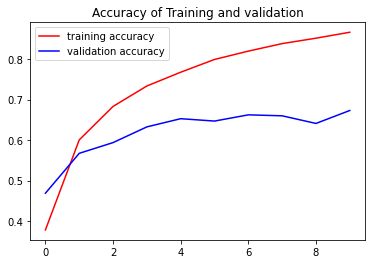

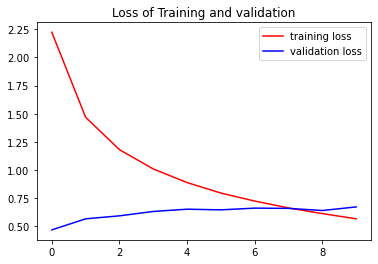

<Figure size 432x288 with 0 Axes>

In [25]:
# to plot graph for accuracy, validation accuracy, loss, validation loss # 
acc = network.history['accuracy']
val_acc = network.history['val_accuracy']
loss = network.history['loss']
val_loss = network.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label = 'training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'validation accuracy')
plt.title('Accuracy of Training and validation')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label = 'training loss')
plt.plot(epochs, val_acc, 'b', label = 'validation loss')
plt.title('Loss of Training and validation')
plt.legend()
plt.figure()

1st model loss and accuracy for training and validation graph: From the graph, I can conclude that as the accuracy of training progresses, the model is learning from the training data and fitting to the training examples. The training accuracy has an upward trend. While for loss of training and validation, the losses consistently decrease and the model is learning make making better predictions over time. 

In [26]:
# retrieves and displays the keys #
history_dict = network.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [27]:
# evaluating the 1st model and getting the loss and accuracy of it # 
loss, accuracy, = model.evaluate(testSetTensor, testSetLabels)
print('Test accuracy: %.2f' % (accuracy))

225/225 [==============================] - 0s 755us/step - loss: 1.0953 - accuracy: 0.6729
Test accuracy: 0.67


From this evaluation, I know that we have enough statistical power as it has a validation accuracy above 0.5.

## 6) Scaling up: developing a model that overfits

Since I know that I have enough statistical power, we can increase the layers of the model. I will be using Convolution 2D as it is utilised for images and max pooling to reduce the spatial dimensions of the inputs.

"2D Convolutions are instrumental when creating convolutional neural networks or just for general image processing filters such as blurring, sharpening, edge detection, and many more. They are based on the idea of using a kernel and iterating through an input image to create an output image" [2]


In [28]:
# 2nd model #
# a more complex keras neural network with multiple CNN layers #
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), padding = 'same', input_shape = trainSetTensor[0].shape, activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), padding = 'same', activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(256, (3, 3), padding = 'same', activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(25, activation = 'softmax')
])

In [29]:
# compiling the 2nd model # 
model.compile(optimizer = 'rmsprop',loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [30]:
# summary of the 2nd model #
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 256)         295168    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 256)       

In [31]:
# training the 2nd network with 10 epochs #
network = model.fit(trainSetTensor, trainSetLabels, epochs = 10, validation_data=(testSetTensor, testSetLabels))

Epoch 1/10
858/858 [==============================] - 22s 25ms/step - loss: 0.6093 - accuracy: 0.8133 - val_loss: 0.1688 - val_accuracy: 0.9476
Epoch 2/10
858/858 [==============================] - 23s 26ms/step - loss: 0.0291 - accuracy: 0.9930 - val_loss: 0.1983 - val_accuracy: 0.9598
Epoch 3/10
858/858 [==============================] - 23s 27ms/step - loss: 0.0127 - accuracy: 0.9972 - val_loss: 0.2426 - val_accuracy: 0.9583
Epoch 4/10
858/858 [==============================] - 21s 25ms/step - loss: 0.0121 - accuracy: 0.9980 - val_loss: 1.0062 - val_accuracy: 0.8805
Epoch 5/10
858/858 [==============================] - 22s 26ms/step - loss: 0.0096 - accuracy: 0.9984 - val_loss: 0.2206 - val_accuracy: 0.9651
Epoch 6/10
858/858 [==============================] - 22s 25ms/step - loss: 0.0068 - accuracy: 0.9987 - val_loss: 0.3049 - val_accuracy: 0.9498
Epoch 7/10
858/858 [==============================] - 22s 26ms/step - loss: 0.0044 - accuracy: 0.9994 - val_loss: 0.3170 - val_accuracy:

<Figure size 432x288 with 0 Axes>

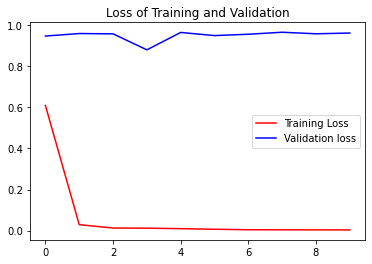

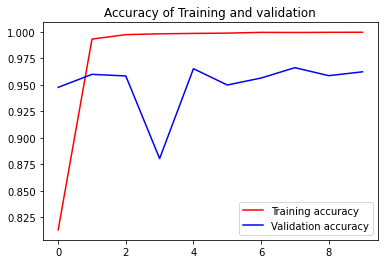

<Figure size 432x288 with 0 Axes>

In [32]:
# to plot graph for accuracy, validation accuracy, loss, validation loss # 
acc = network.history['accuracy']
val_acc = network.history['val_accuracy']
loss = network.history['loss']
val_loss = network.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, loss, 'r', label = 'Training Loss')
plt.plot(epochs, val_acc, 'b', label = 'Validation loss')
plt.title('Loss of Training and Validation')
plt.legend()
plt.figure()

plt.plot(epochs, acc, 'r', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
plt.title('Accuracy of Training and validation')
plt.legend()
plt.figure()



2nd model loss and accuracy for training and validation graph: From the graph, it shows consistent loss reduction for training and validation over 10 epochs, implying effective learning and convergence. Validation loss consistently remains below training loss, indicating successful generalization. Accuracy for training and validation improves progressively, reaching 99.98% and around 95.61%, respectively, underscoring effective learning and robust generalization. 

In [33]:
# evaluating the 2nd model and getting the loss and accuracy of it # 
loss, accuracy, = model.evaluate(testSetTensor, testSetLabels)
print('Test accuracy: %.2f' % (accuracy))

225/225 [==============================] - 2s 8ms/step - loss: 0.3923 - accuracy: 0.9622
Test accuracy: 0.96


From the graph, I can see that it is overfitting as the validation data beings to degrade. Which next I can go to the next step, regularising my model and tuning hyperparameters

## Regularising my model and tuning my hyperparameters

In [34]:
# 3rd model #
# a even more complex keras neural sequential network with multiple layers #
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding = 'same', input_shape = trainSetTensor[0].shape, activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (3,3), padding = 'same', activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, (3,3), padding = 'same', activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = 'relu', bias_regularizer=tf.keras.regularizers.l2(1e-4)),
    tf.keras.layers.Dense(25, activation = 'softmax')
])

In [35]:
# compiling the 3rd model # 
model.compile(optimizer='rmsprop',loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [36]:
# summary of the 3rd model #
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization (BatchN  (None, 14, 14, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                      

In [37]:
# training the 3rd network with 10 epochs #
network = model.fit(trainSetTensor, trainSetLabels, epochs = 10, validation_data = (testSetTensor, testSetLabels))

Epoch 1/10
858/858 [==============================] - 11s 12ms/step - loss: 0.1684 - accuracy: 0.9535 - val_loss: 0.2915 - val_accuracy: 0.9260
Epoch 2/10
858/858 [==============================] - 9s 10ms/step - loss: 0.0132 - accuracy: 0.9967 - val_loss: 0.2731 - val_accuracy: 0.9453
Epoch 3/10
858/858 [==============================] - 12s 13ms/step - loss: 0.0103 - accuracy: 0.9982 - val_loss: 0.4298 - val_accuracy: 0.9320
Epoch 4/10
858/858 [==============================] - 11s 12ms/step - loss: 0.0093 - accuracy: 0.9988 - val_loss: 0.3805 - val_accuracy: 0.9504
Epoch 5/10
858/858 [==============================] - 10s 12ms/step - loss: 0.0030 - accuracy: 0.9991 - val_loss: 0.3249 - val_accuracy: 0.9537
Epoch 6/10
858/858 [==============================] - 11s 13ms/step - loss: 0.0026 - accuracy: 0.9996 - val_loss: 0.4068 - val_accuracy: 0.9571
Epoch 7/10
858/858 [==============================] - 11s 12ms/step - loss: 0.0019 - accuracy: 0.9996 - val_loss: 0.5436 - val_accuracy: 

<Figure size 432x288 with 0 Axes>

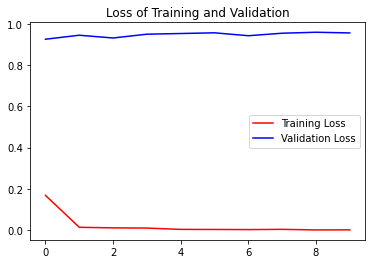

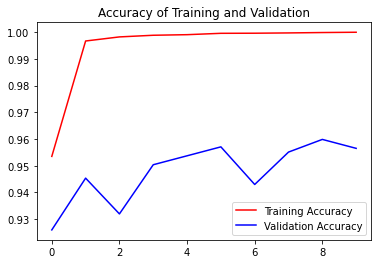

<Figure size 432x288 with 0 Axes>

In [38]:
# to plot graph for accuracy, validation accuracy, loss, validation loss # 
acc = network.history['accuracy']
val_acc = network.history['val_accuracy']
loss = network.history['loss']
val_loss = network.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, loss, 'r', label = 'Training Loss')
plt.plot(epochs, val_acc, 'b', label = 'Validation Loss')
plt.title('Loss of Training and Validation')
plt.legend()
plt.figure()

plt.plot(epochs, acc, 'r', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title('Accuracy of Training and Validation')
plt.legend()
plt.figure()

3rd model loss and accuracy for training and validation graph: From the graph, I can conclude that the training and validation losses vary with an initial training loss of 0.1771 and a validation loss of 0.3123. Both losses fluctuate, indicating complex interactions between training and validation data. Simultaneously, training accuracy begins at 95.10%, validation accuracy at 92.72%, with training accuracy improving as validation accuracy fluctuates, revealing the intricate learning process and data responsiveness. 

In [41]:
# evaluating the 3rd model and getting the loss and accuracy of it # 
loss, accuracy, = model.evaluate(testSetTensor, testSetLabels)
print('Test accuracy: %.2f' % (accuracy))

225/225 [==============================] - 1s 3ms/step - loss: 0.3465 - accuracy: 0.9677
Test accuracy: 0.97


In [42]:
# evaluating the ASL model using sklearn code #
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# converting one-hot encoded labels to integer labels #
train_true_classes = np.argmax(trainSetLabels, axis = 1)

# calculating metrics for training data #
train_predictions = model.predict(trainSetTensor)
train_pred_classes = np.argmax(train_predictions, axis = 1)

# calculating metrics for training data #
train_accuracy = accuracy_score(train_true_classes, train_pred_classes)
train_precision = precision_score(train_true_classes, train_pred_classes, average='weighted')
train_recall = recall_score(train_true_classes, train_pred_classes, average='weighted')
train_f1 = f1_score(train_true_classes, train_pred_classes, average='weighted')

# output score #
print("Training Metrics:")
print("Accuracy:", train_accuracy)
print("Precision:", train_precision)
print("Recall:", train_recall)
print("F1 Score:", train_f1)


858/858 [==============================] - 3s 4ms/step
Training Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


### Using webcam to test 

In [43]:
# getLetter function that takes the ASL input then interprets it as an index #
# and returns the letter from the given class labels. It returns "Error" if its neither any of them #
def getLetter (result): 
    classLabels = { 0: 'A',
                    1: 'B',
                    2: 'C',
                    3: 'D',
                    4: 'E',
                    5: 'F',
                    6: 'G',
                    7: 'H',
                    8: 'I',
                    9: 'K',
                    10: 'L',
                    11: 'M',
                    12: 'N',
                    13: '0',
                    14: 'P',
                    15: 'Q',
                    16: 'R',
                    17: 'S',
                    18: 'T',
                    19: 'U',
                    20: 'V',
                    21: 'W',
                    22: 'X',
                    23: 'Y'}
    try:
        res = int(result) 
        return classLabels [res]
    except:
        return "Error"

In [ ]:
# using OpenCV to real-time test the model output of the ASL #
# open the video capture #
cap = cv2.VideoCapture(0)

while True:
    # read frame from cam #
    ret, frame = cap.read()

    # if not, break #
    if not ret:
        break

    # frame of region of interest (roi) #
    roi = frame[90:300, 360:560]

    # converting to grayscale #
    roi_gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)

    # resizing the roi #
    roi_resized = cv2.resize(roi_gray, (28, 28), interpolation = cv2.INTER_AREA)

    # create copy #
    copy = frame.copy()

    # creating rectangle where the designated handsign will be #
    cv2.rectangle(copy, (360, 90), (560, 300), (255, 255, 0), 4)

    # reshaping the resized ROI for prediction of letter #
    roi_reshaped = roi_resized.reshape(1, 28, 28, 1).astype('float32') / 255.0

    # model prediction #
    predicted_probs = model.predict(roi_reshaped)
    predicted_class = np.argmax(predicted_probs)

    # output letter #
    letter = getLetter(predicted_class)

    # output letter on the frame #
    cv2.putText(copy, letter, (440, 90), cv2.FONT_HERSHEY_COMPLEX, 2, (255, 0, 0), 2)

    # displaying frame with the letter #
    cv2.imshow('frame', copy)

    # check for key press to exit webcam #
    key = cv2.waitKey(1)
    if key == 13:  
        break
    elif key == ord('e'):  # exit when 'e' key is pressed #
        cv2.destroyAllWindows()
        cap.release()
        break

# exit cv and close all windows #
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 19ms/step


# References 

[1] Team, T.A.I. (2020) How, when, and why should you normalize / standardize / rescale..., Towards AI. Available at: https://towardsai.net/p/data-science/how-when-and-why-should-you-normalize-standardize-rescale-your-data-3f083def38ff#:~:text=Standardization%3A,end%20up%20creating%20a%20bais. (Accessed: June 20, 2023).

[2] Sahoo, S. (2022) 2D convolution using Python & NumPy, Medium. Analytics Vidhya. Available at: https://medium.com/analytics-vidhya/2d-convolution-using-python-numpy-43442ff5f381#:~:text=2D%20Convolutions%20are%20instrumental%20when,to%20create%20an%20output%20image. (Accessed: June 23, 2023).